         date   HDD  demand  HDD_rolling  lag_demand  day_of_week  HDD_diff  \
6  2022-01-07  40.8   256.5    30.214286       168.0            4      18.1   
7  2022-01-08  32.7   223.2    30.600000       256.5            5      -8.1   
8  2022-01-09  20.3   168.2    30.128571       223.2            6     -12.4   
9  2022-01-10  30.4   212.3    29.971429       168.2            0      10.1   
10 2022-01-11  20.4   133.4    27.142857       212.3            1     -10.0   

    is_weekend  demand_rolling  
6            0      200.542857  
7            1      203.600000  
8            1      205.014286  
9            0      205.128571  
10           0      190.742857  


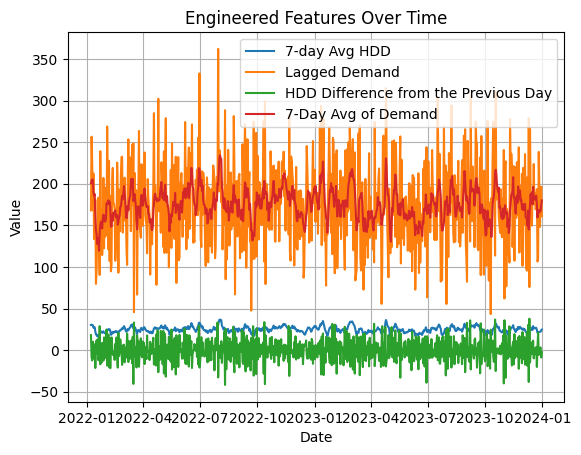

In [3]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from preprocess import merge_and_clean_data, create_features

# 📥 Load data (same as before)
df_weather = pd.read_csv("noaa_hdd.csv", parse_dates=["date"])
df_energy = pd.read_csv("eia_natgas.csv", parse_dates=["date"])

# 🔗 Merge and clean
df_merged = merge_and_clean_data(df_weather, df_energy)

# 🛠️ Feature engineering
df_features = create_features(df_merged)

# 🧪 Preview engineered data
print(df_features.head())

# 📊 Visualize engineered features
plt.plot(df_features["date"], df_features["HDD_rolling"], label="7-day Avg HDD")
plt.plot(df_features["date"], df_features["lag_demand"], label="Lagged Demand")
plt.plot(df_features["date"], df_features["HDD_diff"], label="HDD Difference from the Previous Day")
plt.plot(df_features["date"], df_features["demand_rolling"], label="7-Day Avg of Demand")
plt.title("Engineered Features Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# 💾 Optional: Save final dataset
df_features.to_csv("/content/Data_Outputs/modeling_dataset.csv", index=False)


